<a href="https://colab.research.google.com/github/joenvihe/Data-Science--Cheat-Sheet/blob/master/data_process_bel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pwd
#Fijo la carpeta
%cd /content/gdrive/My Drive/personal/BELCORP

/content
/content/gdrive/My Drive/personal/BELCORP


In [0]:
import numpy as np
import pandas as pd
from dateutil.parser import parse 
from datetime import datetime
import matplotlib.pyplot as plt

In [0]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.rcParams['agg.path.chunksize'] = 10000
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [0]:
# Para reducir memoria de los datasets:
def reduce_memory(ds_tmp):
    int_columns = ds_tmp.select_dtypes(include=[np.int16,np.int32,np.int64]).columns.tolist()
    
    for col in int_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='integer')

    float_columns = ds_tmp.select_dtypes(include=[np.float64]).columns.tolist()
    for col in float_columns:
        ds_tmp[col] = pd.to_numeric(arg=ds_tmp[col], downcast='float')

# Cargando Bases

In [0]:
#https://www.machinelearningplus.com/time-series/time-series-analysis-python/
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
#https://datascience.stackexchange.com/questions/45684/multivariate-time-series-binary-classification

## CAMPANA CONSULTORA

In [0]:
ds_cc = pd.read_csv("campana_consultora.csv")
ds_cc = ds_cc.drop_duplicates()
reduce_memory(ds_cc)
ds_cc = ds_cc.drop(columns=['codigocanalorigen', 'Unnamed: 0'])

In [0]:
ds_cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501988 entries, 0 to 1501987
Data columns (total 20 columns):
campana                              1501988 non-null int32
IdConsultora                         1501988 non-null int32
Flagpasopedido                       1501988 non-null int8
flagactiva                           1501988 non-null int8
flagpasopedidocuidadopersonal        1501988 non-null float32
flagpasopedidomaquillaje             1501988 non-null float32
flagpasopedidotratamientocorporal    1501988 non-null float32
flagpasopedidotratamientofacial      1501988 non-null float32
flagpedidoanulado                    1501988 non-null float32
flagpasopedidofragancias             1501988 non-null float32
codigofactura                        1028986 non-null object
evaluacion_nuevas                    1501984 non-null object
segmentacion                         1501988 non-null object
flagpasopedidoweb                    1501988 non-null float32
cantidadlogueos                 

In [0]:
ds_p = pd.read_csv("predict_submission.csv")
ds_p = ds_p.drop_duplicates()
ds_p.columns=["IdConsultora","flagpasopedido"]
reduce_memory(ds_p)
ds_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120895 entries, 0 to 120894
Data columns (total 2 columns):
IdConsultora      120895 non-null int32
flagpasopedido    0 non-null float32
dtypes: float32(1), int32(1)
memory usage: 1.8 MB


In [0]:
ds_p.shape

(120895, 2)

In [0]:
result_aux = pd.merge(ds_cc,ds_p,on='IdConsultora')
result_aux.shape

(1484805, 21)

In [0]:
ds_consultora = pd.read_csv("maestro_consultora.csv",index_col=None)
ds_consultora = ds_consultora.drop_duplicates()
reduce_memory(ds_consultora)
ds_consultora = ds_consultora.drop(columns=['flagcorreovalidad', 'Unnamed: 0'])

In [0]:
ds_consultora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123740 entries, 0 to 123739
Data columns (total 9 columns):
campanaingreso           123740 non-null int32
campanaultimopedido      123740 non-null int32
IdConsultora             123740 non-null int32
estadocivil              123734 non-null object
flagsupervisor           123740 non-null int8
campanaprimerpedido      123739 non-null float32
flagconsultoradigital    123740 non-null int8
edad                     123740 non-null int8
flagcelularvalidado      123740 non-null int8
dtypes: float32(1), int32(3), int8(4), object(1)
memory usage: 4.2+ MB


In [0]:
result = pd.merge(ds_consultora,result_aux,on='IdConsultora')
result.shape

(1484805, 29)

In [0]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484805 entries, 0 to 1484804
Data columns (total 29 columns):
campanaingreso                       1484805 non-null int32
campanaultimopedido                  1484805 non-null int32
IdConsultora                         1484805 non-null int32
estadocivil                          1484705 non-null object
flagsupervisor                       1484805 non-null int8
campanaprimerpedido                  1484787 non-null float32
flagconsultoradigital                1484805 non-null int8
edad                                 1484805 non-null int8
flagcelularvalidado                  1484805 non-null int8
campana                              1484805 non-null int32
Flagpasopedido                       1484805 non-null int8
flagactiva                           1484805 non-null int8
flagpasopedidocuidadopersonal        1484805 non-null float32
flagpasopedidomaquillaje             1484805 non-null float32
flagpasopedidotratamientocorporal    1484805 n

In [0]:
result_v1 = result[[
"campanaingreso",
"campanaultimopedido",
"IdConsultora",
"campanaprimerpedido",
"campana",
"Flagpasopedido",
"flagactiva",
"cantidadlogueos"
]].sort_values(by=['IdConsultora','campana'])


In [0]:
result_max = result_v1.groupby(['IdConsultora'])['campanaultimopedido'].max()
result_max = result_max.to_frame()

In [0]:
data_result = []
for i in result_max.loc[result_max["campanaultimopedido"]<=201906].index.values:
  data_result.append({"IdConsultora":i,"Flagpasopedido_fijo":0})

for i in result_max.loc[result_max["campanaultimopedido"]==201907].index.values:
  data_result.append({"IdConsultora":i,"Flagpasopedido_fijo":1})


In [0]:
df_fijo = pd.DataFrame(data_result)

In [0]:
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(df_fijo.shape[0]/ds_p.shape[0]*100,df_fijo.shape[0], ds_p.shape[0])

'porcentaje:45.13503453409984, valores_encontrados:54566, total:120895 '

In [0]:
result_l = pd.merge(result,
                 df_fijo,
                 on='IdConsultora', 
                 how='left')
result_res = result_l.loc[result_l["Flagpasopedido_fijo"].notnull() == False]

In [0]:
result_18 = result_res.groupby(['IdConsultora'])['Flagpasopedido'].min().to_frame()

for i in result_18.loc[result_18["Flagpasopedido"]==1].index.values:
  data_result.append({"IdConsultora":i,"Flagpasopedido_fijo":1})

In [0]:
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(len(data_result)/ds_p.shape[0]*100,len(data_result), ds_p.shape[0])

'porcentaje:72.1055461350759, valores_encontrados:87172, total:120895 '

In [0]:
df_fijo2 = pd.DataFrame(data_result)
result_l1 = pd.merge(result,
                 df_fijo2,
                 on='IdConsultora', 
                 how='left')
result_res1 = result_l1.loc[result_l1["Flagpasopedido_fijo"].notnull() == False]

In [0]:
cant = 0
cant_5 = 0
cant_t = 0
result_res1["unos"] = 1
for k,r in result_res1.groupby(['IdConsultora','campanaultimopedido'])['unos','Flagpasopedido'].sum().iterrows():
  prom = r["Flagpasopedido"]/ r["unos"]
  if prom >= 0.70 and k[1] >=201909: # 1
    cant += 1
    data_result.append({"IdConsultora":k[0],"Flagpasopedido_fijo":1})
  elif prom <= 0.50 and k[1] <201905: # 0
    data_result.append({"IdConsultora":k[0],"Flagpasopedido_fijo":0})
    cant_5 += 1
  cant_t += 1 
  
print(cant)
print(cant_5)
print(cant_t)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


21012
0
33723


In [0]:
#len(data_result)
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(len(data_result)/ds_p.shape[0]*100,len(data_result), ds_p.shape[0])

'porcentaje:89.48591753174242, valores_encontrados:108184, total:120895 '

In [0]:
df_fijo3 = pd.DataFrame(data_result)
result_l2 = pd.merge(result,
                 df_fijo3,
                 on='IdConsultora', 
                 how='left')
result_res2 = result_l2.loc[result_l2["Flagpasopedido_fijo"].notnull() == False]

In [0]:
result_res2.shape

(194329, 30)

In [0]:
result_res2.sort_values(by=['IdConsultora','campana']).to_csv("result_res2.csv")

In [0]:
result_res3 = result_res2.loc[((result_res2["campana"]>=201905) | (result_res2["campana"]<=201807)) & (result_res2["campanaultimopedido"]>=201915)].groupby(["IdConsultora"])["Flagpasopedido"].sum().to_frame()

for k, v in result_res3.loc[result_res3["Flagpasopedido"]==3].iterrows():
  data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":1})

In [0]:
len(data_result)
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(len(data_result)/ds_p.shape[0]*100,len(data_result), ds_p.shape[0])

'porcentaje:89.85069688572729, valores_encontrados:108625, total:120895 '

In [0]:
df_fijo4 = pd.DataFrame(data_result)
result_l3 = pd.merge(result,
                 df_fijo4,
                 on='IdConsultora', 
                 how='left')
result_res4 = result_l3.loc[result_l3["Flagpasopedido_fijo"].notnull() == False]
result_res4 = result_res4.sort_values(by=['IdConsultora','campana'])
result_res4.to_csv("result_res2.csv")

In [0]:
result_l5 = result_res4[[
    "campanaultimopedido",
    "IdConsultora",
    "estadocivil",
    "campanaprimerpedido",
    "edad",
    "flagcelularvalidado",
    "campana",
    "Flagpasopedido",
    "flagactiva",
    "evaluacion_nuevas",
    "segmentacion",
    "flagpasopedidoweb"

]].sort_values(by=['IdConsultora','campana'])

result_l5["uno"] = 1

#temp = []
for k,r in result_l5.groupby(['IdConsultora'])['uno','Flagpasopedido',"flagactiva"].sum().iterrows():
  porc_ped = r["flagactiva"] / r["uno"]
  porc_act = r["Flagpasopedido"] / r["flagactiva"]

  if porc_ped >= 0.90 and porc_act >= 0.9: # 1
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":1})
  if porc_ped <= 0.60 and porc_act <= 0.6: # 0
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":0})
  
#print(len(temp))

In [0]:
len(data_result)
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(len(data_result)/ds_p.shape[0]*100,len(data_result), ds_p.shape[0])

'porcentaje:90.98970180735348, valores_encontrados:110002, total:120895 '

In [0]:
df_fijo5 = pd.DataFrame(data_result)
result_temp5 = pd.merge(result,
                 df_fijo5,
                 on='IdConsultora', 
                 how='left')
result_res5 = result_temp5.loc[result_temp5["Flagpasopedido_fijo"].notnull() == False]
result_res5 = result_res5.sort_values(by=['IdConsultora','campana'])
result_res5.to_csv("result_res5.csv")
len(list(set(result_res5["IdConsultora"].values)))

10893

In [0]:
result_l6 = result_res5[[
    "campanaultimopedido",
    "IdConsultora",
    "estadocivil",
    "campanaprimerpedido",
    "edad",
    "flagcelularvalidado",
    "campana",
    "Flagpasopedido",
    "flagactiva",
    "evaluacion_nuevas",
    "segmentacion",
    "flagpasopedidoweb"

]].sort_values(by=['IdConsultora','campana'])

#temp=[]
for k,r in result_l6.loc[result_l6["campana"]>=201904].groupby(["IdConsultora"])["Flagpasopedido","flagactiva"].sum().iterrows():
  if r["Flagpasopedido"] >= 3 and r["flagactiva"] >= 3: # 1
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":1})
  if r["Flagpasopedido"] == 0 and r["flagactiva"] in [0,1,2]: # 0
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":0})
  
#print(len(temp))

In [0]:
len(data_result)
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(len(data_result)/ds_p.shape[0]*100,len(data_result), ds_p.shape[0])

'porcentaje:94.44559328342777, valores_encontrados:114180, total:120895 '

In [0]:
df_fijo6 = pd.DataFrame(data_result)
result_temp6 = pd.merge(result,
                 df_fijo6,
                 on='IdConsultora', 
                 how='left')
result_res6 = result_temp6.loc[result_temp6["Flagpasopedido_fijo"].notnull() == False]
result_res6 = result_res6.sort_values(by=['IdConsultora','campana'])
result_res6.to_csv("result_res6.csv")
len(list(set(result_res6["IdConsultora"].values)))

6715

In [0]:
ds_fuerzaventa = pd.read_csv("dtt_fvta_cl.csv")
reduce_memory(ds_fuerzaventa)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ds_fuerzaventa.columns = ['campana', 'IdConsultora', 'codigotipooferta', 'descuento', 'ahorro',
       'canalingresoproducto', 'idproducto', 'codigopalancapersonalizacion',
       'palancapersonalizacion', 'preciocatalogo', 'grupooferta',
       'realanulmnneto', 'realdevmnneto', 'realuuanuladas', 'realuudevueltas',
       'realuufaltantes', 'realuuvendidas', 'realvtamnfaltneto',
       'realvtamnneto', 'realvtamncatalogo', 'realvtamnfaltcatalogo']

result_fv = ds_fuerzaventa.groupby(['IdConsultora','campana'])['ahorro','realuuanuladas','realuudevueltas','realuufaltantes','realuuvendidas','realvtamnneto'].mean()
result_fv = result_fv.reset_index()

result_aux7 = pd.merge(result_res6,result_fv,how='left',on=['IdConsultora','campana']).fillna(0)
print(result_aux7.shape)
print(len(list(set(result_aux7["IdConsultora"].values))))
result_aux7.to_csv("result_aux7.csv")

(101986, 36)
6715


In [0]:
result_l7 = result_aux7[[
    "IdConsultora","estadocivil","campanaprimerpedido","edad","campana","Flagpasopedido","flagactiva",
    "evaluacion_nuevas","segmentacion","ahorro","realuuanuladas","realuudevueltas","realuufaltantes","realuuvendidas","realvtamnneto"
]].sort_values(by=['IdConsultora','campana'])
result_l7["uno"] = 1

for k,r in result_l7.loc[result_l7["campana"]>=201904].groupby(["IdConsultora"])["uno","Flagpasopedido","flagactiva","realuufaltantes","realvtamnneto","realuudevueltas","realuuvendidas","realuuanuladas"].sum().iterrows():
  prom_a = r["flagactiva"]/r["uno"]
  prom_p = r["Flagpasopedido"]/r["flagactiva"]
  if prom_p >= 1 and prom_a > 0.5 and r["realuuvendidas"] > 1:        
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":1})
  if prom_p < 1 and   r["realuuvendidas"] <= 1:
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":0}) 
  

In [0]:
len(data_result)
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(len(data_result)/ds_p.shape[0]*100,len(data_result), ds_p.shape[0])

'porcentaje:95.99239009057446, valores_encontrados:116050, total:120895 '

In [0]:
df_fijo8 = pd.DataFrame(data_result) 
result_temp8 = pd.merge(result,df_fijo8, on='IdConsultora', how='left')
result_temp8 = result_temp8.loc[result_temp8["Flagpasopedido_fijo"].notnull() == False]
result_temp8 = pd.merge(result_temp8,result_fv,how='left',on=['IdConsultora','campana'])
result_res8 = result_temp8.sort_values(by=['IdConsultora','campana'])
result_res8.fillna(0).to_csv("result_res8.csv")
len(list(set(result_res8["IdConsultora"].values)))

4845

In [0]:
result_l8 = result_res8[[
    "IdConsultora","estadocivil","campanaprimerpedido","edad","campana","Flagpasopedido","flagactiva",
    "evaluacion_nuevas","segmentacion","ahorro","realuuanuladas","realuudevueltas","realuufaltantes","realuuvendidas","realvtamnneto"
]].sort_values(by=['IdConsultora','campana'])
result_l8["uno"] = 1

result_l8 = result_l8.loc[result_l8["campana"]>=201904].groupby(["IdConsultora"])["Flagpasopedido","flagactiva","realuuvendidas"].sum()
result_l8 = result_l8.reset_index()

for k,r in result_l8.iterrows():
  if r["Flagpasopedido"] == 2 and r["flagactiva"] == 3:        
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":1})
  elif r["Flagpasopedido"] == 1 and r["flagactiva"] == 3:        
    data_result.append({"IdConsultora":k,"Flagpasopedido_fijo":0}) 



In [0]:
len(data_result)
"porcentaje:{}, valores_encontrados:{}, total:{} ".format(len(data_result)/ds_p.shape[0]*100,len(data_result), ds_p.shape[0])

'porcentaje:97.90562057984201, valores_encontrados:118363, total:120895 '

In [0]:
result_l8.loc[result_l8["IdConsultora"]==363409]

,IdConsultora,Flagpasopedido,flagactiva,realuuvendidas
864,363409,2,3,2.448052


In [0]:
res_temp = pd.DataFrame(data_result)
res_temp.to_csv("res_temp.csv")

In [0]:
d = {
201807:1,
201808:2,
201809:3,
201810:4,
201811:5,
201812:6,
201813:7,
201814:8,
201815:9,
201816:10,
201817:11,
201818:12,
201901:13,
201902:14,
201903:15,
201904:16,
201905:17,
201906:18
}

ds_cc['fch_campana'] = ds_cc['campana'].map(d)  
#ds_cc.dtypes
ds_cc = ds_cc.set_index('fch_campana')

NameError: ignored

In [0]:
ds_cc.index.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='fch_campana')

In [0]:
ds_cc.head()

,campana,IdConsultora,Flagpasopedido,flagactiva,flagpasopedidocuidadopersonal,flagpasopedidomaquillaje,flagpasopedidotratamientocorporal,flagpasopedidotratamientofacial,flagpedidoanulado,flagpasopedidofragancias,codigofactura,evaluacion_nuevas,segmentacion,flagpasopedidoweb,cantidadlogueos,flagdispositivo,flagdigital,flagofertadigital,flagsuscripcion,geografia
fch_campana,,,,,,,,,,,,,,,,,,,,
1,201807,21821,0,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Est,Nivel5,0.0,NaN,0,NaN,0.0,0,15 SUR GRANDE
1,201807,81604,0,1,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Est,Nivel2,0.0,0.0,0,NaN,0.0,1,17 SANTIAGO PONIENTE
1,201807,134091,1,1,1.0,1.0,1.0,0.0,0.0,1.0,WEB,Est,Nivel5,1.0,2.0,1,0.0,0.0,0,16 SUR AUSTRAL
1,201807,176046,0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Est,Nivel2,0.0,NaN,0,NaN,0.0,0,17 SANTIAGO PONIENTE
1,201807,204546,1,1,1.0,1.0,0.0,1.0,0.0,1.0,WEB,Est,Nivel4,1.0,3.0,1,0.0,0.0,0,11 NORTE GRANDE


##Productos

In [0]:
ds_producto = pd.read_csv("maestro_producto.csv",index_col=None)
ds_producto = ds_producto.drop_duplicates()
reduce_memory(ds_producto)
ds_producto = ds_producto.drop(columns=['Unnamed: 0'])

In [0]:
ds_producto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3189
Data columns (total 9 columns):
idproducto             3190 non-null int32
codigounidadnegocio    3190 non-null int8
unidadnegocio          3190 non-null object
codigomarca            3190 non-null int8
marca                  3190 non-null object
codigocategoria        3190 non-null object
categoria              3190 non-null object
codigotipo             3190 non-null object
tipo                   3182 non-null object
dtypes: int32(1), int8(2), object(6)
memory usage: 193.1+ KB


## Consultora

In [0]:
ds_consultora = pd.read_csv("maestro_consultora.csv",index_col=None)
ds_consultora = ds_consultora.drop_duplicates()
reduce_memory(ds_consultora)
ds_consultora = ds_consultora.drop(columns=['flagcorreovalidad', 'Unnamed: 0'])

In [0]:
ds_consultora.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123740 entries, 0 to 123739
Data columns (total 9 columns):
campanaingreso           123740 non-null int32
campanaultimopedido      123740 non-null int32
IdConsultora             123740 non-null int32
estadocivil              123734 non-null object
flagsupervisor           123740 non-null int8
campanaprimerpedido      123739 non-null float32
flagconsultoradigital    123740 non-null int8
edad                     123740 non-null int8
flagcelularvalidado      123740 non-null int8
dtypes: float32(1), int32(3), int8(4), object(1)
memory usage: 4.2+ MB


## Fuerza Venta

In [0]:
ds_fuerzaventa = pd.read_csv("dtt_fvta_cl.csv")
reduce_memory(ds_fuerzaventa)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
ds_fuerzaventa['fch_campana'] = ds_fuerzaventa['campana'].map(d)  
#ds_cc.dtypes
ds_fuerzaventa = ds_fuerzaventa.set_index('fch_campana')
ds_fuerzaventa.index.unique()

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype='int64', name='fch_campana')

In [0]:
ds_fuerzaventa_na = ds_fuerzaventa.dropna()

In [0]:
ds_fuerzaventa_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967082 entries, 11 to 18
Data columns (total 21 columns):
campana                         int32
idconsultora                    int32
codigotipooferta                int16
descuento                       float32
ahorro                          float32
canalingresoproducto            object
idproducto                      int32
codigopalancapersonalizacion    float32
palancapersonalizacion          object
preciocatalogo                  float32
grupooferta                     object
realanulmnneto                  float32
realdevmnneto                   float32
realuuanuladas                  int8
realuudevueltas                 int16
realuufaltantes                 int16
realuuvendidas                  int16
realvtamnfaltneto               float32
realvtamnneto                   float32
realvtamncatalogo               float32
realvtamnfaltcatalogo           float32
dtypes: float32(10), int16(4), int32(3), int8(1), object(3)
memory usag

In [0]:
ds_fuerzaventa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15141943 entries, 201807 to 201906
Data columns (total 20 columns):
idconsultora                    int32
codigotipooferta                int16
descuento                       float32
ahorro                          float32
canalingresoproducto            object
idproducto                      int32
codigopalancapersonalizacion    float32
palancapersonalizacion          object
preciocatalogo                  float32
grupooferta                     object
realanulmnneto                  float32
realdevmnneto                   float32
realuuanuladas                  int8
realuudevueltas                 int16
realuufaltantes                 int16
realuuvendidas                  int16
realvtamnfaltneto               float32
realvtamnneto                   float32
realvtamncatalogo               float32
realvtamnfaltcatalogo           float32
dtypes: float32(10), int16(4), int32(2), int8(1), object(3)
memory usage: 1.3+ GB


In [0]:
ds_fuerzaventa.head()

,idconsultora,codigotipooferta,descuento,ahorro,canalingresoproducto,idproducto,codigopalancapersonalizacion,palancapersonalizacion,preciocatalogo,grupooferta,realanulmnneto,realdevmnneto,realuuanuladas,realuudevueltas,realuufaltantes,realuuvendidas,realvtamnfaltneto,realvtamnneto,realvtamncatalogo,realvtamnfaltcatalogo
campana,,,,,,,,,,,,,,,,,,,,
201807,544706,1,0.0,7990.0,NaN,200091158,12.0,NaN,5495.0,DEMO + GVTAS,0.0,0.0,0,0,0,2,0.0,9236.0,10990.0,0.0
201807,638877,1,0.0,3800.0,WEB,200091762,1111.0,NaN,7690.0,DEMO + GVTAS,0.0,0.0,0,0,0,1,0.0,6462.0,7690.0,0.0
201807,186016,1,0.0,3800.0,APP,200091762,42.0,NaN,7690.0,DEMO + GVTAS,0.0,0.0,0,0,0,1,0.0,6462.0,7690.0,0.0
201807,579940,1,0.0,32748.0,WEB,200091762,12.0,NaN,6032.0,DEMO + GVTAS,0.0,0.0,0,0,0,6,0.0,30414.0,36192.0,0.0
201807,342158,1,0.0,17272.0,WEB,200091762,12.0,NaN,7172.0,DEMO + GVTAS,0.0,0.0,0,0,0,4,0.0,24108.0,28688.0,0.0


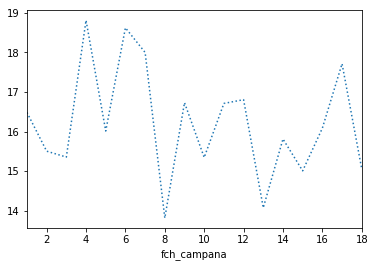

In [0]:
by_weekday = ds_fuerzaventa["descuento"].groupby(ds_fuerzaventa.index).mean()
by_weekday.index = ds_fuerzaventa.index.unique()
by_weekday.plot(style=[':', '--', '-']);

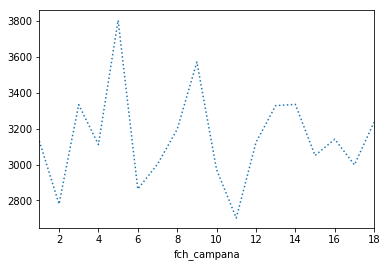

In [0]:
by_weekday = ds_fuerzaventa["ahorro"].groupby(ds_fuerzaventa.index).mean()
by_weekday.index = ds_fuerzaventa.index.unique()
by_weekday.plot(style=[':', '--', '-']);

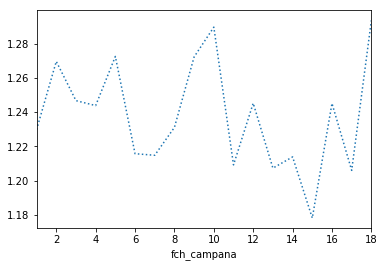

In [0]:
#preciocatalogo realdevmnneto	realuuanuladas	realuudevueltas	realuufaltantes	realuuvendidas	realvtamnfaltneto	realvtamnneto	realvtamncatalogo	realvtamnfaltcatalog
by_weekday = ds_fuerzaventa["realuuvendidas"].groupby(ds_fuerzaventa.index).mean()
by_weekday.index = ds_fuerzaventa.index.unique()
by_weekday.plot(style=[':', '--', '-']);

In [0]:
plt.rcParams['agg.path.chunksize'] = 10000

In [0]:
ds_fuerzaventa.count()

campana                         15141943
idconsultora                    15141943
codigotipooferta                15141943
descuento                       15141943
ahorro                          15141943
canalingresoproducto            10705788
idproducto                      15141943
codigopalancapersonalizacion    13974469
palancapersonalizacion           6963891
preciocatalogo                  15141943
grupooferta                      8295750
realanulmnneto                  15141943
realdevmnneto                   15141943
realuuanuladas                  15141943
realuudevueltas                 15141943
realuufaltantes                 15141943
realuuvendidas                  15141943
realvtamnfaltneto               15141943
realvtamnneto                   15141943
realvtamncatalogo               15141943
realvtamnfaltcatalogo           15141943
dtype: int64

In [0]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
#descuento                       float32
#ahorro                          float32
#preciocatalogo                  float32
#realanulmnneto                  float32
#realdevmnneto                   float32
#realuuanuladas                  int8
#realuudevueltas                 int16
#realuufaltantes                 int16
#realuuvendidas                  int16
#realvtamnfaltneto               float32
#realvtamnneto                   float32
#realvtamncatalogo               float32
#realvtamnfaltcatalogo           float32


df_aux = ds_fuerzaventa[["descuento","ahorro","preciocatalogo","realanulmnneto","realdevmnneto",
                         "realuuanuladas","realuudevueltas","realuufaltantes","realuuvendidas",
                         "realvtamnfaltneto","realvtamnneto","realvtamncatalogo","realvtamnfaltcatalogo"
                        ]]

In [0]:
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

(15141943, 21)

In [0]:
values = df_aux.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7,8,9,10,11,12]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df_aux.columns[group], y=0.5, loc='right')
	i += 1
plt.show()